<a href="https://colab.research.google.com/github/agnieszkaaax1/uczenie_maszynowe/blob/use_case1/case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Przygotowanie danych - sprawdzenie braków, standaryzacja
2.   Redukcja wymiarów
3.   Zbilansowanie częściowe próbki
4.   Wybór modelu



Biblioteki:

In [1]:
import pandas as pd
from imblearn.under_sampling import NearMiss
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, train_test_split
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
import math


Dane:

In [2]:

df = pd.read_csv('case1.csv', sep=';')
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [ ]:
df.shape

(9841, 51)

In [3]:
df['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

delikatnie niezbilansowany zbiór - jedna klasa jest pomiędzy 20% a 40%

In [4]:
df['ERC20 most sent token type'].value_counts()

0                                                         4399
None                                                      1856
                                                          1191
EOS                                                        138
OmiseGO                                                    137
                                                          ... 
Arcona Distribution Contract                                 1
HeroCoin                                                     1
Cindicator                                                   1
UnlimitedIP Token                                            1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name: ERC20 most sent token type, Length: 305, dtype: int64

In [5]:
df['ERC20_most_rec_token_type'].value_counts()

0                        4399
OmiseGO                   873
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            207
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name: ERC20_most_rec_token_type, Length: 467, dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'FLAG'}>,
        <Axes: title={'center': 'Avg min between sent tnx'}>,
        <Axes: title={'center': 'Avg min between received tnx'}>,
        <Axes: title={'center': 'Time Diff between first and last (Mins)'}>,
        <Axes: title={'center': 'Sent tnx'}>],
       [<Axes: title={'center': 'Received Tnx'}>,
        <Axes: title={'center': 'Number of Created Contracts'}>,
        <Axes: title={'center': 'Unique Received From Addresses'}>,
        <Axes: title={'center': 'Unique Sent To Addresses'}>,
        <Axes: title={'center': 'min value received'}>,
        <Axes: title={'center': 'max value received '}>,
        <Axes: title={'center': 'avg val received'}>],
       [<Axes: title={'center': 'min val sent'}>,
        <Axes: title={'center': 'max val sent'}>,
        <Axes: title={'center': 'avg val sent'}>,
        <Axes: title={'center': 'min value sent to c

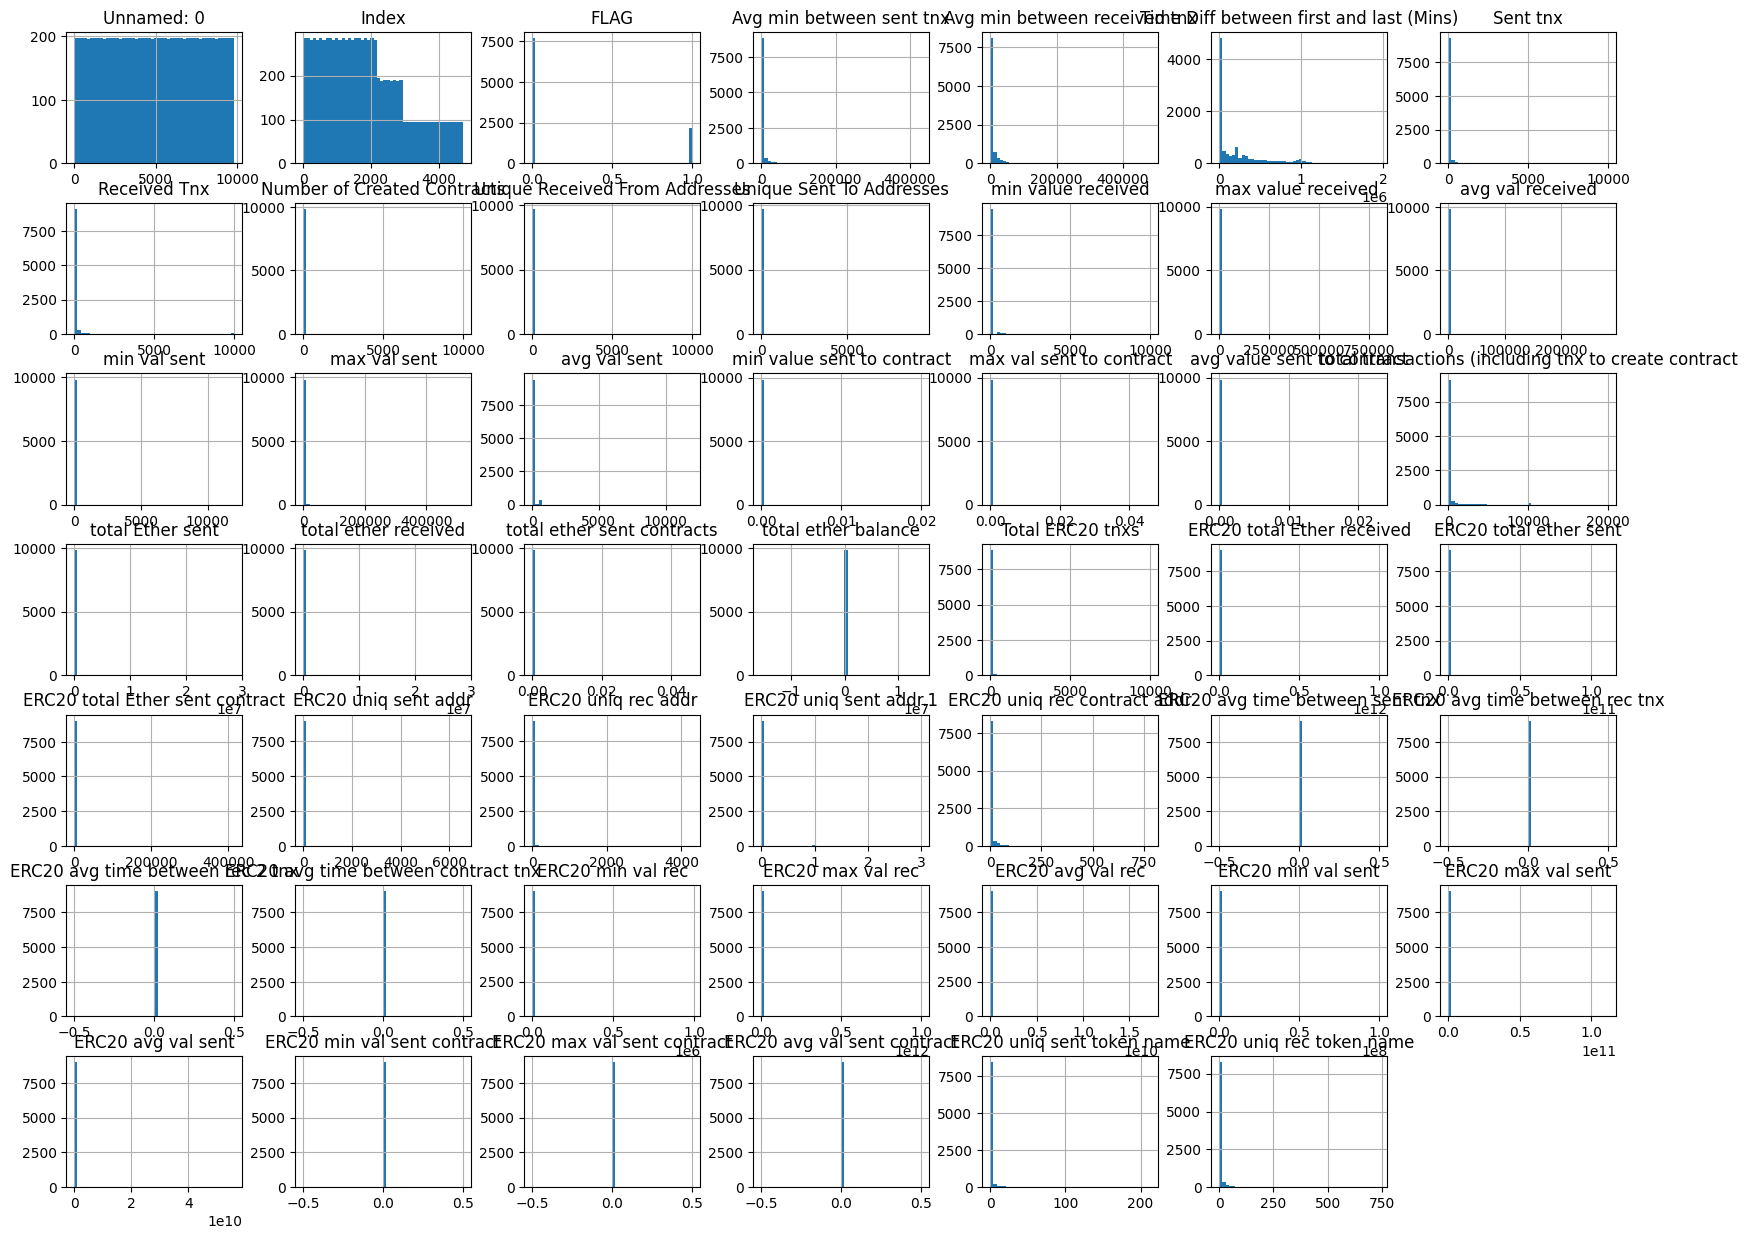

In [6]:
df.hist(bins=50, figsize=(20, 15))

In [7]:
df.isna().sum()

Unnamed: 0                                                0
Index                                                     0
Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                            

In [8]:
df.dtypes

Unnamed: 0                                                int64
Index                                                     int64
Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                            

Usuniecie niepotrzebnych kolumn:

In [9]:
df = df.drop("Index", axis=1)
df = df.drop("Address", axis=1)


In [10]:
df

,Unnamed: 0,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,1,12635.10,631.39,58748.48,4,13,0,11,4,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,1,0.00,0.00,0.00,0,0,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,1,0.00,0.00,0.00,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [12]:
df['Index'].duplicated().sum()

0

Sprawdzenie duplikatów indeksu:

In [13]:
df.drop_duplicates(subset="Index", inplace=True)

In [14]:
df.describe()

,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [15]:
for i in df.columns:
  print(df[i].value_counts())
print('*'*50)

0       1
6564    1
6557    1
6558    1
6559    1
       ..
3281    1
3282    1
3283    1
3284    1
9840    1
Name: Index, Length: 9841, dtype: int64
0    7662
1    2179
Name: FLAG, dtype: int64
0.00        3522
2.11          14
161.55        13
2.86          12
21.68         11
            ... 
98.14          1
14.83          1
2238.59        1
3895.33        1
37242.70       1
Name: Avg min between sent tnx, Length: 5013, dtype: int64
0.00        2829
0.82          77
0.84          50
0.33          45
0.30          41
            ... 
87.24          1
18383.40       1
1553.67        1
14525.41       1
149.56         1
Name: Avg min between received tnx, Length: 6223, dtype: int64
0.00         631
327.37        16
324.73        15
6.32          15
325.23        14
            ... 
654799.17      1
147093.40      1
3112.90        1
590169.85      1
670817.33      1
Name: Time Diff between first and last (Mins), Length: 7810, dtype: int64
0       2015
1       1507
3       1303
2       1

In [ ]:
pip install numpy seaborn

Zastąpienie braków danych NaN

In [16]:
for column in df.columns:
    df[column] = df[column].replace({'':np.nan})

Zastąpienie braków danych w kolumnach numerycznych średnią:

In [17]:
#braki zastępowane średnią w kolumnach z liczbami
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns.fillna(numeric_columns.mean(), inplace=True)
df.update(numeric_columns)

Zastąpienie braków danych w kolumnach typu object wartościami najczęściej występującymi:

In [18]:
#braki zastępowane najczęsciej występowanymi wartościami w kolumnach z object
for column in ['ERC20 most sent token type', 'ERC20_most_rec_token_type']:
    if df[column].dtype == 'object':
        most_common_value = df[column].mode()[0]
        df[column].fillna(most_common_value, inplace=True)

In [19]:
df.describe()

,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9.841000e+03,9841.0,9841.0,9841.0,9841.000000,9841.000000
mean,4920.000000,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,...,1.008377e+10,2.049013e+08,1.008210e+06,1.129109e+09,5.660130e+08,0.0,0.0,0.0,6.445170,15.960582
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,...,5.356400e-01,4.332520e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,...,6.000000e+02,1.480957e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,4.000000
max,9840.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


Sprawdzenie braków danych:

In [20]:
df.isna().sum()

Index                                                   0
FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent t

In [21]:
df['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

Zakodowanie zmiennych kategorycznych:

In [22]:


# Tworzenie instancji LabelEncodera
le = LabelEncoder()

# Zakodowanie kolumny 'ERC20 most sent token type'
df['ERC20 most sent token type'] = le.fit_transform(df['ERC20 most sent token type'])
df['ERC20_most_rec_token_type'] = le.fit_transform(df['ERC20_most_rec_token_type'])


In [23]:
df.head()

,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,63,300
1,1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,154,257
2,2,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,185,436
3,3,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,217,436
4,4,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,238,154


In [24]:
df['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [25]:
# Pobranie listy wszystkich kolumn
all_columns = df.columns

# Wykluczenie kolumn nienumerycznych
col_float = [col for col in all_columns if col not in ['FLAG', 'ERC20 most sent token type', 'ERC20_most_rec_token_type']]



Standaryzacja zmiennych oraz redukcja wymiarów:

In [26]:
scaler = MinMaxScaler()
for i in df[col_float]:
  df[i] = scaler.fit_transform(df[[i]])
df.head()


pca = PCA(n_components=0.95)

df2 = pca.fit(df)
print(pca.explained_variance_ratio_)



[0.8979593  0.10203062]


In [27]:
X = df.drop('FLAG', axis = 1)
X = X.drop("Index", axis=1)
y = df['FLAG']
X
y

0       0
1       0
2       0
3       0
4       0
       ..
9836    1
9837    1
9838    1
9839    1
9840    1
Name: FLAG, Length: 9841, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.33, random_state = 42, shuffle = True)

In [29]:
X_train

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
1317,0.000055,3.733081e-07,3.664199e-05,0.0003,0.0002,0.0000,0.0002,0.000323,0.001264,0.000110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4,3
4151,0.000006,0.000000e+00,4.926182e-06,0.0004,0.0002,0.0000,0.0002,0.000431,0.093594,0.001331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4,3
121,0.000012,7.743177e-03,6.502544e-02,0.0034,0.0034,0.0000,0.0001,0.003661,0.000010,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4,3
2449,0.000583,6.375687e-04,1.615092e-01,0.1187,0.0058,0.0000,0.0002,0.071175,0.000050,0.000937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002714,185,309
3753,0.000371,1.659147e-06,1.639912e-04,0.0002,0.0002,0.0000,0.0002,0.000215,0.004058,0.000076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.000000,3.359186e-02,1.159982e-01,0.0000,0.0014,0.0001,0.0006,0.000000,0.000000,0.000018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002714,185,309
5191,0.000000,0.000000e+00,7.862002e-03,0.0001,0.0001,0.0000,0.0001,0.000108,0.000200,0.000003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009498,185,257
5390,0.000000,0.000000e+00,9.054352e-07,0.0001,0.0001,0.0000,0.0001,0.000108,0.000199,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4,3
860,0.000384,0.000000e+00,1.689634e-04,0.0002,0.0002,0.0000,0.0002,0.000215,0.004977,0.000064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4,3


In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
confusion_matrix(y_test, y_pred)

Accuracy: 0.9762931034482759
Precision: 0.9613180515759312
Recall: 0.9306518723994452


array([[2500,   27],
       [  50,  671]])

Random Under Sampler

In [31]:
rus = RandomUnderSampler()

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [32]:
y_train_rus.value_counts()

0    1458
1    1458
Name: FLAG, dtype: int64

In [33]:
knn_rus = KNeighborsClassifier(n_neighbors=3)
knn_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = knn_rus.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rus)
precision = precision_score(y_test, y_pred_rus)
recall = recall_score(y_test, y_pred_rus)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
confusion_matrix(y_test, y_pred_rus)

Accuracy: 0.9612068965517241
Precision: 0.8888888888888888
Recall: 0.9431345353675451


array([[2442,   85],
       [  41,  680]])

Near Miss

In [34]:
nm = NearMiss(version = 3, n_neighbors = 3)
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


In [36]:
knn_nm = KNeighborsClassifier(n_neighbors=3)
knn_nm.fit(X_train_nm, y_train_nm)
y_pred_nm = knn_nm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_nm)
precision = precision_score(y_test, y_pred_nm)
recall = recall_score(y_test, y_pred_nm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
confusion_matrix(y_test, y_pred_nm)

Accuracy: 0.9725985221674877
Precision: 0.9352617079889807
Recall: 0.941747572815534


array([[2480,   47],
       [  42,  679]])

Oversampling

In [37]:
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)
#counter = Counter(y)

In [38]:
knn_os = KNeighborsClassifier(n_neighbors=3)
knn_os.fit(X_train_os, y_train_os)
y_pred_os = knn_os.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_os)
precision = precision_score(y_test, y_pred_os)
recall = recall_score(y_test, y_pred_os)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
confusion_matrix(y_test, y_pred_os)

Accuracy: 0.9679802955665024
Precision: 0.9129852744310576
Recall: 0.9459084604715673


array([[2462,   65],
       [  39,  682]])

Pipeline:

In [39]:

model = KNeighborsClassifier(n_neighbors=3)
over = SMOTE(sampling_strategy = 0.3)
under = RandomUnderSampler(sampling_strategy = 0.5)


pipeline = make_pipeline(over, under, model)

In [40]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2527
           1       0.94      0.93      0.94       721

    accuracy                           0.97      3248
   macro avg       0.96      0.96      0.96      3248
weighted avg       0.97      0.97      0.97      3248



Regresja logistyczna
Wagi eksperckie:

In [41]:
weights = {0:1.0, 1:1.0}
model1 = LogisticRegression(solver ='lbfgs',class_weight=weights)
model1.fit(X_train, y_train)
y_pred_lr1 = model1.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred_lr1)
precision = precision_score(y_test, y_pred_lr1)
recall = recall_score(y_test, y_pred_lr1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
confusion_matrix(y_test, y_pred_lr1)

Accuracy: 0.8599137931034483
Precision: 0.9262820512820513
Recall: 0.40083217753120665


array([[2504,   23],
       [ 432,  289]])

In [43]:
model2 = LogisticRegression(solver ='lbfgs',class_weight="balanced")
model2.fit(X_train, y_train)
y_pred_lr2 = model2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
accuracy = accuracy_score(y_test, y_pred_lr2)
precision = precision_score(y_test, y_pred_lr2)
recall = recall_score(y_test, y_pred_lr2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
confusion_matrix(y_test, y_pred_lr2)

Accuracy: 0.6314655172413793
Precision: 0.364
Recall: 0.883495145631068


array([[1414, 1113],
       [  84,  637]])

In [45]:
randomforest = RandomForestClassifier(n_estimators=100, random_state=1)
randomforest_p = make_pipeline(over, under, pca, randomforest)
randomforest_p.fit(X_train, y_train)

y_pred_randomforest = randomforest_p.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_randomforest)
precision = precision_score(y_test, y_pred_randomforest)
recall = recall_score(y_test, y_pred_randomforest)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
confusion_matrix(y_test, y_pred_randomforest)


Accuracy: 0.9298029556650246
Precision: 0.8108448928121059
Recall: 0.8918169209431346


array([[2377,  150],
       [  78,  643]])

In [46]:
maxabs_scaler = MaxAbsScaler()

In [47]:
svm = SVC(kernel='rbf', random_state=1)
svm_p = make_pipeline(maxabs_scaler, over, under, pca, svm)
svm_p.fit(X_train, y_train)
y_pred_svm = svm_p.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
confusion_matrix(y_test, y_pred_svm)


Accuracy: 0.8980911330049262
Precision: 0.955607476635514
Recall: 0.5672676837725381


array([[2508,   19],
       [ 312,  409]])

Szukamy modelu, którego wskaźnik recall jest najwyższy, więc najlepszym modelem dla tych danych będzie model knn z oversamplingiem